## Regression: starting at the very beginning

A regression problem is one in which you are trying to predict the value of a continuous variable from the given data. A few examples of this could be predicting house prices or the temperature outside in the future. 

Remember that although the following examples only have 2 or 3 dimensions, real problems often have MANY more. It is difficult to visualize relationships between multiple features in higher dimensions. If you are interested in exploring these relationships, I suggest you learn more about dimensionality reduction techniques (not covered here). 

**Incomplete Glossary**: 
* **Feature**: an input to a machine learning model
* **Training set**: a group of examples, each with their full feature sets, used to train a machine learning model. This is usually presented in the form of an N$\times$M matrix where N is the number of examples and M is the number of features. Included in the training set is an N$\times$1 vector of labels indicating the true value that should be predicted for each training example. 
* **Testing set**: the remainder of the dataset not used for training. The vector of true labels for these datapoints is used to compare against the model predictions to determine the model's error. 
* **R$^{2}$**: coefficient of determination, an error metric ranging from 0 to 1 that indicates the proportion of variance in the dependent variable (i.e. true labels) that can be predicted from the independent variables or features. In other words, how clear of a trend can be seen in the data on the same order as the best fit line?  
* **RMSE**: Root mean squared error, a non-negative error metric starting at 0 indicating how well the predicted values match the actual values. Note that RMSE is context-specific as it depends on the scale of the data.  

### Linear regression simplest example: Ordinary Least Squares 

Additional topics covered: Error metrics, Standardization, Feature Importance

Let's start by importing all important packages: 

In [1]:
import numpy as np # this one's for math          

import matplotlib.pyplot as plt # this one's for plotting figures 
from mpl_toolkits.mplot3d import Axes3D # allows for 3D plots 

import pandas as pd # this one's for manipulating data files 

import sklearn # this is where all the cool machine learning stuff comes in 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

Now I'm going to generate some data to work with, and force some relationships:

In [2]:
# generate random data for the simplest case 
N = 50 # number of examples
feature1 = np.random.uniform(0,100,N)
feature2 = np.random.uniform(0,1,N)
X = np.array([feature1,feature2]).transpose()
y = feature1 + 15 # NOTICE THAT WE ARE ONLY DEPENDENT ON ONE FEATURE AND ADDING A FIXED OFFSET

Now we split the data into training and testing sets. Ordinary least squares doesn't have any hyperparameters. Models with hyperparameters will require additional cross validation for hyperparameter tuning.  

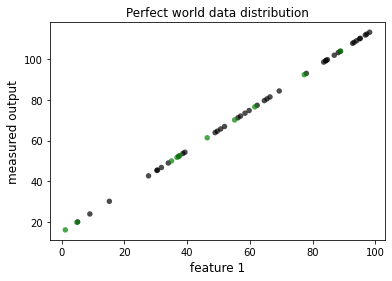

In [3]:
# split training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2 , random_state=1)

# format the arrays so that they will work with the algorithms properly
X_train.reshape(-1,1)
X_test.reshape(-1,1)
y_train.reshape(-1,1)
y_test.reshape(-1,1)


fig = plt.figure(); 
cm = plt.cm.get_cmap('jet') # set the colormap
pl1 = plt.scatter(X_train[:,0],y_train,c = 'black',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
pl2 = plt.scatter(X_test[:,0],y_test,c = 'green',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
plt.title('Perfect world data distribution')
plt.xlabel('feature 1',fontsize=12)
plt.ylabel('measured output',fontsize=12)
# plt.colorbar(pl)
plt.show()

Now that we've seen the data, let's fit a line:   

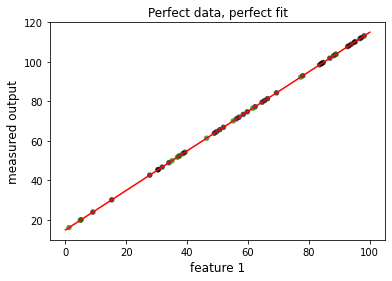

In [4]:
plt.close() # need this to close the interactive figure above

# fit model, plot line in red, calculate RMSE and R^2
lin_reg = LinearRegression().fit(X_train, y_train) # the default parameters automatically check for an offset 
w = lin_reg.coef_
b = lin_reg.intercept_


fig = plt.figure(); 
cm = plt.cm.get_cmap('jet') # set the colormap
pl1 = plt.scatter(X_train[:,0],y_train,c = 'black',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
pl2 = plt.scatter(X_test[:,0],y_test,c = 'green',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
xx = np.linspace(0, 100, 1000)
yy = w[0]*xx+b # fit line from model (feature 1 only)
plt.plot(xx,yy,c='red')
plt.title('Perfect data, perfect fit')
plt.xlabel('feature 1',fontsize=12)
plt.ylabel('measured output',fontsize=12)
# plt.colorbar(pl)
plt.show()


To evaluate the quality of this fit, we calculate R$^{2}$ and RMSE:

In [5]:
plt.close() # need this to close the interactive figure above

y_pred_train = lin_reg.predict(X_train)
R2_train = r2_score(y_train,y_pred_train)
RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False) 
print('The R\u00b2 value for this model on the training data is',R2_train)
print('The RMSE value for this model on the training data is',RMSE_train)

# add test data to plot in different color, calculate RMSE and R^2 
y_pred_test = lin_reg.predict(X_test)
R2_test = r2_score(y_test, y_pred_test) 
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False) 
print('\nThe R\u00b2 value for this model on the test data is',R2_test)
print('The RMSE value for this model on the test data is',RMSE_test)

The R² value for this model on the training data is 1.0
The RMSE value for this model on the training data is 1.2370893888999141e-14

The R² value for this model on the test data is 1.0
The RMSE value for this model on the test data is 1.3340428037280522e-14


***
Now let's add a little noise and see what happens to R$^{2}$ and RMSE. Change noise_level and see what changes.

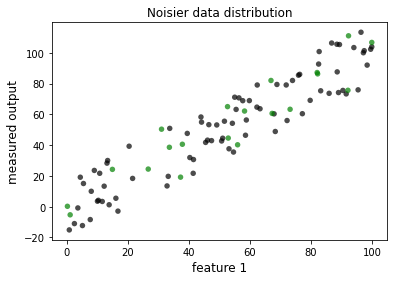

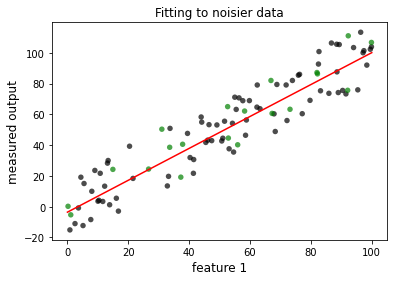

The R² value for this model on the training data is 0.8720441396702945
The RMSE value for this model on the training data is 12.09229828931035

The R² value for this model on the test data is 0.877985470115204
The RMSE value for this model on the test data is 10.996993512971004


In [6]:
# now we add noise and the performance goes down
N = 100
noise_level = 20

# generate random data for the simplest case 
feature1 = np.random.uniform(0,100,N)
feature2 = np.random.uniform(0,1,N)
X = np.array([feature1,feature2]).transpose()
y_uni = feature1 + np.random.uniform(-noise_level,noise_level,N) # SINGLE FEATURE, UNIFORM RANDOM OFFSET 

# split training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y_uni, test_size  = 0.2 , random_state=1)

# format the arrays so that they will work with the algorithms properly
X_train.reshape(-1,1)
X_test.reshape(-1,1)
y_train.reshape(-1,1)
y_test.reshape(-1,1)


fig = plt.figure(); 
cm = plt.cm.get_cmap('jet') # set the colormap
pl1 = plt.scatter(X_train[:,0],y_train,c = 'black',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
pl2 = plt.scatter(X_test[:,0],y_test,c = 'green',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
plt.title('Noisier data distribution')
plt.xlabel('feature 1',fontsize=12)
plt.ylabel('measured output',fontsize=12)
# plt.colorbar(pl)
plt.show()

# fit model, plot line in red, calculate RMSE and R^2
lin_reg = LinearRegression().fit(X_train, y_train) # the default parameters automatically check for an offset 
w = lin_reg.coef_
b = lin_reg.intercept_


fig = plt.figure(); 
cm = plt.cm.get_cmap('jet') # set the colormap
pl1 = plt.scatter(X_train[:,0],y_train,c = 'black',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
pl2 = plt.scatter(X_test[:,0],y_test,c = 'green',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
xx = np.linspace(0, 100, 1000)
yy = w[0]*xx+b # fit line from model (feature 1 only)
plt.plot(xx,yy,c='red')
plt.title('Fitting to noisier data')
plt.xlabel('feature 1',fontsize=12)
plt.ylabel('measured output',fontsize=12)
# plt.colorbar(pl)
plt.show()


# Calculate error stats on the model
y_pred_train = lin_reg.predict(X_train)
R2_train = r2_score(y_train,y_pred_train)
RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False) 
print('The R\u00b2 value for this model on the training data is',R2_train)
print('The RMSE value for this model on the training data is',RMSE_train)

# add test data to plot in different color, calculate RMSE and R^2 
y_pred_test = lin_reg.predict(X_test)
R2_test = r2_score(y_test, y_pred_test) 
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False) 
print('\nThe R\u00b2 value for this model on the test data is',R2_test)
print('The RMSE value for this model on the test data is',RMSE_test)

***
Linear Regression won't work well on nonlinear distributions, unless you engineer nonlinear features. If you think your use case requires nonlinearity, I recommend using a different model that allows for nonlinear combinations. 

Let's take a look at trying to fit a nonlinear distribution: 

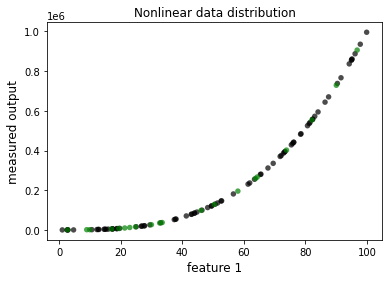

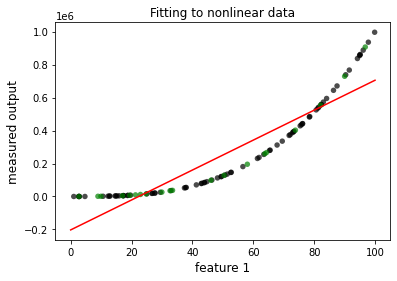

The R² value for this model on the training data is 0.851045770114779
The RMSE value for this model on the training data is 111173.25940513873

The R² value for this model on the test data is 0.8383298087880753
The RMSE value for this model on the test data is 104360.92751612539

Important things to notice:
	1. The R² value still looks pretty good in this simple case
	2. The RMSE is always going to be domain specific. It does not fall within a specified range
	   like R² from 0 to 1. You will need to think about and specify what makes a "good" RMSE
	   value when reporting your results.


In [7]:
plt.close() # need this to close the interactive figure above

N = 100
noise_level = 500

# generate random data for the simplest case 
feature1 = np.random.uniform(0,100,N)
feature2 = np.random.uniform(0,1,N)
X = np.array([feature1,feature2]).transpose()
y_uni = feature1**3 + np.random.uniform(-noise_level,noise_level,N) # SINGLE FEATURE, UNIFORM RANDOM OFFSET 

# split training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y_uni, test_size  = 0.2 , random_state=1)

# format the arrays so that they will work with the algorithms properly
X_train.reshape(-1,1)
X_test.reshape(-1,1)
y_train.reshape(-1,1)
y_test.reshape(-1,1)


fig = plt.figure(); 
cm = plt.cm.get_cmap('jet') # set the colormap
pl1 = plt.scatter(X_train[:,0],y_train,c = 'black',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
pl2 = plt.scatter(X_test[:,0],y_test,c = 'green',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
plt.title('Nonlinear data distribution')
plt.xlabel('feature 1',fontsize=12)
plt.ylabel('measured output',fontsize=12)
# plt.colorbar(pl)
plt.show()

# fit model, plot line in red, calculate RMSE and R^2
lin_reg = LinearRegression().fit(X_train, y_train) # the default parameters automatically check for an offset 
w = lin_reg.coef_
b = lin_reg.intercept_


fig = plt.figure(); 
cm = plt.cm.get_cmap('jet') # set the colormap
pl1 = plt.scatter(X_train[:,0],y_train,c = 'black',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
pl2 = plt.scatter(X_test[:,0],y_test,c = 'green',s=30,cmap = cm, alpha = 0.7,edgecolors='none')
xx = np.linspace(0, 100, 1000)
yy = w[0]*xx+b # fit line from model (feature 1 only)
plt.plot(xx,yy,c='red')
plt.title('Fitting to nonlinear data')
plt.xlabel('feature 1',fontsize=12)
plt.ylabel('measured output',fontsize=12)
# plt.colorbar(pl)
plt.show()


# Calculate error stats on the model
y_pred_train = lin_reg.predict(X_train)
R2_train = r2_score(y_train,y_pred_train)
RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False) 
print('The R\u00b2 value for this model on the training data is',R2_train)
print('The RMSE value for this model on the training data is',RMSE_train)

# add test data to plot in different color, calculate RMSE and R^2 
y_pred_test = lin_reg.predict(X_test)
R2_test = r2_score(y_test, y_pred_test) 
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False) 
print('\nThe R\u00b2 value for this model on the test data is',R2_test)
print('The RMSE value for this model on the test data is',RMSE_test)



print('\nImportant things to notice:')
print('\t1. The R\u00b2 value still looks pretty good in this simple case')
print('\t2. The RMSE is always going to be domain specific. It does not fall within a specified range')
print('\t   like R\u00b2 from 0 to 1. You will need to think about and specify what makes a "good" RMSE')
print('\t   value when reporting your results.')


***
Let's add another dimension and pretend that we're trying to estimate blood pressure: 

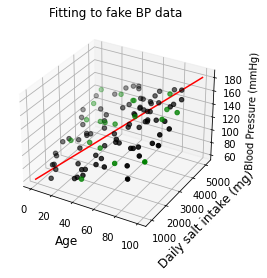

The R² value for this model on the training data is 0.9887433108763869
The RMSE value for this model on the training data is 2.6677493474133094

The R² value for this model on the test data is 0.9875964686055574
The RMSE value for this model on the test data is 2.265382745687912


In [8]:
plt.close() # need this to close the interactive figure above

N = 100
noise_level = 5

# generate random data for the simplest case 
feature1 = np.random.uniform(0,100,N) # represents patient's age 
feature2 = np.random.uniform(1000,5000,N) # represents daily salt intake in milligrams
X = np.array([feature1,feature2]).transpose()
Fake_BP = 0.5*feature1+1.75*np.sqrt(feature2)+np.random.uniform(0,noise_level,N) # SINGLE FEATURE, UNIFORM RANDOM OFFSET 

# split here to another cell, insert commentary on how to split training and testing sets. 
# hint that it will get more complex with hyperparameters

# split training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, Fake_BP, test_size  = 0.2 , random_state=1)

# format the arrays so that they will work with the algorithms properly
X_train.reshape(-1,1)
X_test.reshape(-1,1)
y_train.reshape(-1,1)
y_test.reshape(-1,1)

# fit model, plot line in red, calculate RMSE and R^2
lin_reg = LinearRegression().fit(X_train, y_train) # the default parameters automatically check for an offset 
w = lin_reg.coef_
b = lin_reg.intercept_

# %matplotlib notebook # this allows the plots to be interactive 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pl1 = ax.scatter(X_train[:,0], X_train[:,1], y_train, zdir='z', s=20, c='black', depthshade=True)
pl1 = ax.scatter(X_test[:,0], X_test[:,1], y_test, zdir='z', s=20, c='green', depthshade=True)
xx1 = np.linspace(0, 100, 1000)
xx2 = np.linspace(900,5100,1000)
yy = w[0]*xx1+w[1]*xx2+b # fit line from model
ax.plot(xx1,xx2,yy,c='red')
plt.title('Fitting to fake BP data')
ax.set_xlabel('Age',fontsize=12)
ax.set_ylabel('Daily salt intake (mg)',fontsize=12)
ax.set_zlabel('Blood Pressure (mmHg)')
plt.show()


# Calculate error stats on the model
y_pred_train = lin_reg.predict(X_train)
R2_train = r2_score(y_train,y_pred_train)
RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False) 
print('The R\u00b2 value for this model on the training data is',R2_train)
print('The RMSE value for this model on the training data is',RMSE_train)

# add test data to plot in different color, calculate RMSE and R^2 
y_pred_test = lin_reg.predict(X_test)
R2_test = r2_score(y_test, y_pred_test) 
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False) 
print('\nThe R\u00b2 value for this model on the test data is',R2_test)
print('The RMSE value for this model on the test data is',RMSE_test)

***
What if we want to determine which feature is more important? 

Let's look at our model weights as a crude proxy for feature importance: 

In [9]:
plt.close() # need this to close the interactive figure above

print('Our model weights: ')
print(w)
print('remember the formula: Blood Pressure = w[0]*age+w[1]*salt intake')

Our model weights: 
[0.5024887  0.01691759]
remember the formula: Blood Pressure = w[0]*age+w[1]*salt intake


What do we see? If we just look at the weights, we might come to the conclusion that age is contributing the most
to the model, because its weight is ~31x greater than that for salt intake. 

But what are we not taking into consideration? The different distributions of our features. 

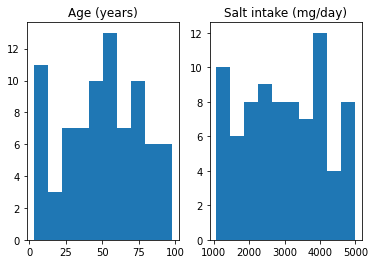

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(X_train[:,0])
ax2.hist(X_train[:,1])
ax1.set_title('Age (years)')
ax2.set_title('Salt intake (mg/day)')
plt.show()

As you can see, the age range is from 0-100 and the salt intake from 1000-5000. 

In order to use the weights to analyze feature importance, we need to standardize our data. 

In [11]:
plt.close() # need this to close the interactive figure above
# Standardization

# split training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, Fake_BP, test_size  = 0.2 , random_state=1)

# format the arrays so that they will work with the algorithms properly
X_train.reshape(-1,1)
X_test.reshape(-1,1)
y_train.reshape(-1,1)
y_test.reshape(-1,1)


# standardization (subtract the mean and divide by the variance - or just use this function)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


What are we doing and what aren't we doing? We are standardizing the training set, and then applying THE SAME
transformation to the test set. Think about why this makes sense. You don't know what you don't know, and you don't know the exact distribution of your test data. 

We're also not normalizing the data (in this case). 
I won't go into the difference between standardization and normalization here. 
If you are interested, read up on it and think about when you would use which. 

What do our distributions look like now?


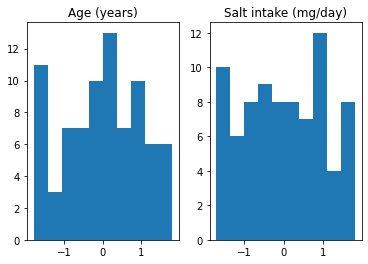

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(X_train[:,0])
ax2.hist(X_train[:,1])
ax1.set_title('Age (years)')
ax2.set_title('Salt intake (mg/day)')
plt.show()

Now let's use these standardized values in training a new model: 

In [13]:
plt.close() # need this to close the interactive figure above

# fit model, plot line in red, calculate RMSE and R^2
lin_reg = LinearRegression().fit(X_train, y_train) # the default parameters automatically check for an offset 
w = lin_reg.coef_
b = lin_reg.intercept_

# Calculate error stats on the model
y_pred_train = lin_reg.predict(X_train)
R2_train = r2_score(y_train,y_pred_train)
RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False) 
print('The R\u00b2 value for this model on the training data is',R2_train)
print('The RMSE value for this model on the training data is',RMSE_train)

# add test data to plot in different color, calculate RMSE and R^2 
y_pred_test = lin_reg.predict(X_test)
R2_test = r2_score(y_test, y_pred_test) 
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False) 
print('\nThe R\u00b2 value for this model on the test data is',R2_test)
print('The RMSE value for this model on the test data is',RMSE_test)

The R² value for this model on the training data is 0.9887433108763869
The RMSE value for this model on the training data is 2.667749347413311

The R² value for this model on the test data is 0.9875964686055575
The RMSE value for this model on the test data is 2.2653827456879094


Note that our R$^{2}$ and RMSE values did not change. 

What are our new weights? 

In [14]:
# let's look at our model weights! 
print('\nOur model weights: ')
print(w)
print('remember the formula: Blood Pressure = w[0]*age+w[1]*salt intake')


Our model weights: 
[13.34937258 18.97299903]
remember the formula: Blood Pressure = w[0]*age+w[1]*salt intake


It looks like age and salt intake are pretty close to being equal contributors to the model, with salt intake being slightly more important. 

***

Feature importance is extremely useful for someone who applies ML to biomedical problems. 

I highly encourage you to use models and methods that easily allow for feature importance estimates. Some models such as random forest will give you feature importance for free. At this point, watch out for models that completely obscure feature importance. Black box models are often harder to translate into medical practice.

Because of the simple math that ordinary least squares performs, it is trying to force a relationship between all of the features and the output. 

You have to be careful with this. Sometimes a useless feature can end up with a really large coefficient and skew your model performance. There are other variants of linear regression that add a regularization step to limit the effects from garbage features. Common variants are Lasso, Ridge, and Elastic Net. Explore these on sklearn! You'll need to tune hyperparameters to use these. An example of how to do this is shared in the basic classification example. 

If you are brand new to regularization, I would recommend trying Elastic net as it is a combination of both Lasso and Ridge. 

Regularization for feature selection is also required when you have too many features and not enough examples. 

For now, play it safe and always try to have many more examples than features. 